In [8]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt
import os

def flatten_concatenation(matrix):
    
    flat_list = []
    
    for row in matrix:
        
        flat_list += row
        
    return flat_list

def Branch_analysis(filename):
    
    # reading the data from dictionaries
    #######################
    with open(filename, 'rb') as handle: 
        data = handle.read() 

    d = pickle.loads(data) 
    #######################
    
    NBranchs = []
    BranchsD = []
    
    #List of Main Branches 
    PathsL = list(d.keys())

    for k in PathsL:
        
        List_Sections = set(flatten_concatenation(d[k]["Names"]))

        NBranch = []
        NBranchD = []

        dds = d[k]["Names"]

        for sec in List_Sections:
            
            if "oma" not in sec:

                ss = 0

                for j in range(len(dds)):

                    for i in range(len(dds[j])):
                        
                        #Check if section is the one we are looking for and guarantee that we don't check it twice
                        if sec == dds[j][i] and ss==0:

                            Nb = d[k]['NBranch'][j][i]
                            Db = d[k]["Distances"][j][i]

                            if Nb>1:
                                
                                NBranch.append(Nb)
                                NBranchD.append(Db)

                                ss = 1

        BranchsD.append(NBranchD)

        NBranchs.append(np.sum((np.array(NBranch) >= 2)))

    print("Number of bifurcations= ",np.sum(NBranchs))
    
    return BranchsD,np.sum(NBranchs)
    

In [9]:

ddir_Pyr = "Pyramidal/"
ddir_Pur = "Purkinjie/"

import pickle 

allfilesPyr = os.listdir(ddir_Pyr)

filenamePyr = [i for i in allfilesPyr if "Branches_Dic" in i]

BranchsDDPyr = []
NBranDDPyr = []

maxBPyr = []

DistDD = []

for i in range(len(filenamePyr)):
    # reading the data from the file 
    with open(ddir_Pyr+filenamePyr[i], 'rb') as handle: 
        data = handle.read() 

    d = pickle.loads(data) 
    
    MainBranch = list(d.keys())
    
    for mainbranch in MainBranch:

        DD = [i[-1] for i in d[mainbranch]["Distances"]]

        DistDD += DD


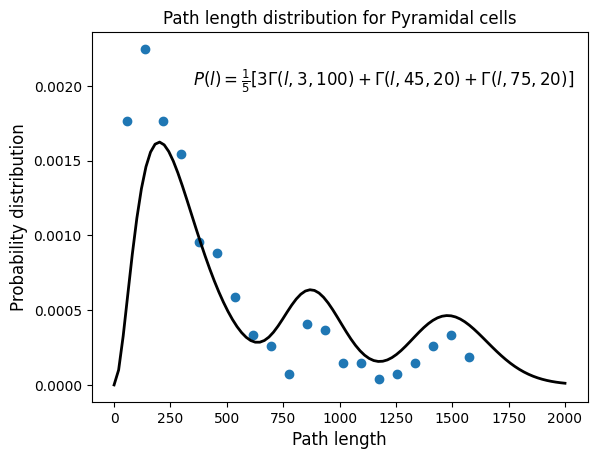

In [10]:

p,dist = np.histogram(DistDD,bins=20,density=True)

dist = 0.5*(dist[1:]+dist[:-1])

plt.plot(dist,p,'o')

plt.xlabel("Path length",fontsize=12)
plt.ylabel("Probability distribution",fontsize=12)

x = np.linspace(0,2000,100)

def ProbPathLengh(x):
    y1 = stats.gamma.pdf(x, a=3, scale=100)
    y2 = stats.gamma.pdf(x, a=45, scale=20)
    y3 = stats.gamma.pdf(x, a=75, scale=20)
    
    return (3*y1+y2+y3)/5

plt.plot(x,ProbPathLengh(x),'-k',lw=2)

plt.text(350,2e-3,r"$P(l)=\frac{1}{5}[3\Gamma(l,3,100)+\Gamma(l,45,20)+\Gamma(l,75,20)]$",fontsize=12)

plt.title("Path length distribution for Pyramidal cells")

plt.savefig("Pyr_Distr_Path_lengh.png",dpi=400,bbox_inches="tight")


In [11]:
allfilesPur = os.listdir(ddir_Pur)

filenamePur = [i for i in allfilesPur if "Branches_Dic" in i]

DistDD = []

for i in range(len(filenamePur)):
    # reading the data from the file 
    with open(ddir_Pur+filenamePur[i], 'rb') as handle: 
        data = handle.read() 

    d = pickle.loads(data) 

    DD = [i[-1] for i in d["Main_branch_1"]["Distances"]]
    
    DistDD += DD


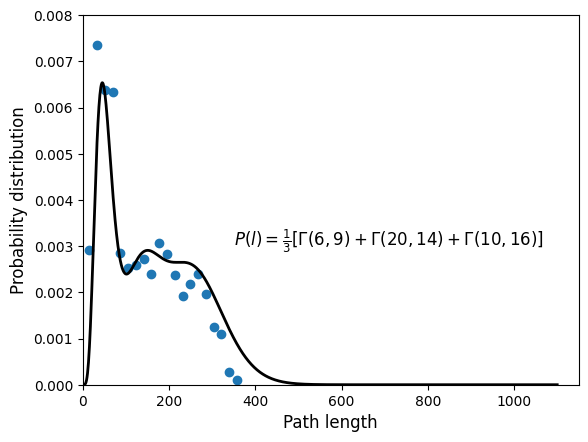

In [12]:

p,dist = np.histogram(DistDD,bins=20,density=True)

dist = 0.5*(dist[1:]+dist[:-1])

plt.plot(dist,p,'o')

plt.xlabel("Path length",fontsize=12)
plt.ylabel("Probability distribution",fontsize=12)

x = np.linspace(0,1100,1000)

def ProbPathLengh(x):
    y1 = stats.gamma.pdf(x, a=6, scale=9)
    y2 = stats.gamma.pdf(x, a=20, scale=14)
    y3 = stats.gamma.pdf(x, a=10, scale=16)
    
    return (y1+y2+y3)/3

plt.plot(x,ProbPathLengh(x),'-k',lw=2)

plt.text(350,3e-3,r"$P(l)=\frac{1}{3}[\Gamma(6,9)+\Gamma(20,14)+\Gamma(10,16)]$",fontsize=12)

plt.xlim(0,1150)
plt.ylim(0,0.008)

plt.savefig("Pur_Distr_Path_lengh.png",dpi=400,bbox_inches="tight")


In [13]:

import pickle 

allfilesPyr = os.listdir(ddir_Pyr)

filenamePyr = [i for i in allfilesPyr if "Branches_Dic" in i]

allfilesPur = os.listdir(ddir_Pur)

filenamePur = [i for i in allfilesPur if "Branches_Dic" in i]

#filenamePur = "Branches_Dic_Pur.txt"

BranchsDDPyr = []
NBranDDPyr = []

maxBPyr = []

for i in range(len(filenamePyr)):

    BranchsD_Pyr,NBran_Pyr = Branch_analysis(ddir_Pyr+filenamePyr[i])
    
    ddmax = []
    for j in BranchsD_Pyr:
          
        ddmax.append(np.max(j))
    
    maxBPyr.append(np.max(ddmax))
    
    BranchsDDPyr.append(BranchsD_Pyr)
    NBranDDPyr.append(NBran_Pyr)

BranchsDDPur = []
NBranDDPur = []

maxBPur = []

for i in range(len(filenamePur)):

    BranchsD_Pur,NBran_Pur = Branch_analysis(ddir_Pur+filenamePur[i])
    
    ddmax = []
    
    for j in BranchsD_Pur:
          
        ddmax.append(np.max(j))
    
    maxBPur.append(np.max(ddmax))
    
    BranchsDDPur.append(BranchsD_Pur)
    NBranDDPur.append(NBran_Pur)


Number of bifurcations=  63
Number of bifurcations=  61
Number of bifurcations=  43
Number of bifurcations=  79
Number of bifurcations=  62
Number of bifurcations=  417
Number of bifurcations=  472
Number of bifurcations=  567
Number of bifurcations=  567
Number of bifurcations=  419
Number of bifurcations=  348


In [14]:
BranchsD_Pyr = flatten_concatenation(flatten_concatenation(BranchsDDPyr))
BranchsD_Pur = flatten_concatenation(flatten_concatenation(BranchsDDPur))

BranchsD = [BranchsD_Pyr,BranchsD_Pur]

NBran = [np.mean(NBranDDPyr),np.mean(NBranDDPur)]


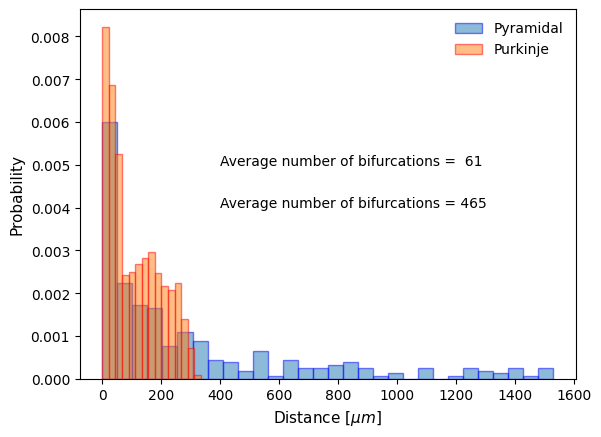

In [15]:
cl = ["b","r"]

Names = ["Pyramidal","Purkinje"]

Bins = [30,15]

Pbdata = []
Disdata = []

for i in range(len(BranchsD)):
    
    p,distanc = np.histogram(BranchsD[i],bins=Bins[i],density=True)
    
    Pbdata.append(p)
    
    Dm = 0.5*(distanc[1:]+distanc[:-1])
    
    Disdata.append(Dm)
    
    plt.bar(Dm,p,width=distanc[1:]-distanc[:-1],alpha=0.5,edgecolor=cl[i],label=Names[i])

    plt.xlabel(r"Distance [$\mu m$]",fontsize=11)
    plt.ylabel(r"Probability",fontsize=11)
    
    plt.text(400,0.005-0.001*i,"Average number of bifurcations = %3d" %(NBran[i]))

plt.legend(frameon=False)

#plt.yscale("log")

plt.savefig("Histogram_bifurcation_analysis.png",dpi=500,bbox_inches="tight")


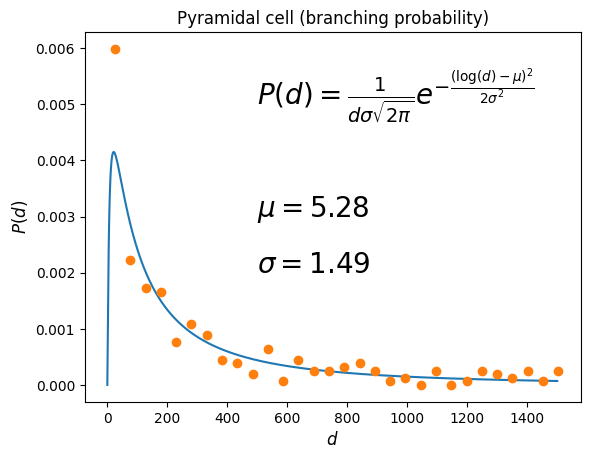

In [16]:
import numpy as np
from scipy.optimize import curve_fit

def ExpP(d,a):
    return 1e-1*(d**-a)

def ExpP(d,mu,sig):
    return np.exp(-(np.log(d)-mu)**2/(2*sig**2))/(d*sig*np.sqrt(2*np.pi))

i = 0

ini = 5
ifi = -1

par,cov = curve_fit(ExpP,Disdata[i][ini:ifi],Pbdata[i][ini:ifi],[10,1])

x = np.linspace(1e-3,1500,1000)

plt.plot(x,ExpP(x,par[0],par[1]),label="Fitted")

plt.plot(Disdata[i],Pbdata[i],'o')

plt.text(5e2,5e-3,r"$P(d)=\frac{1}{d\sigma \sqrt{2\pi}}e^{-\frac{(\log(d)-\mu)^{2}}{2\sigma^{2}}}$",fontsize=20)

plt.text(5e2,3e-3,r"$\mu=%1.2f$"%(par[0]),fontsize=20)
plt.text(5e2,2e-3,r"$\sigma=%1.2f$"%(par[1]),fontsize=20)

plt.xlabel(r"$d$",fontsize=12)

plt.ylabel(r"$P(d)$",fontsize=12)

plt.title("Pyramidal cell (branching probability)",fontsize=12)

plt.savefig("Branching_Prob_Pyramid.png",dpi=400,bbox_inches="tight")

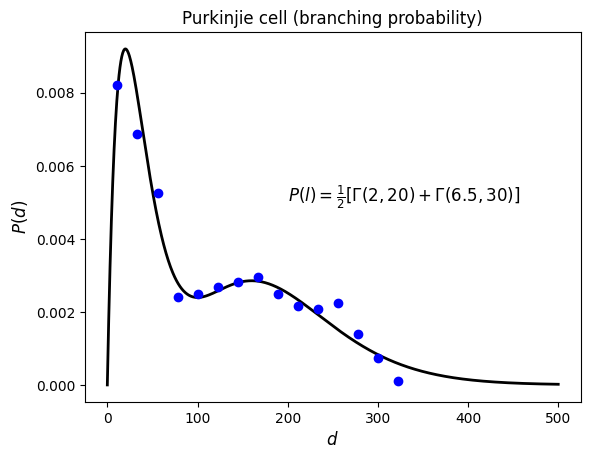

In [17]:
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt

#define three Gamma distributions
x = np.linspace(0, 500, 1000)

def PurkDist(x):
    y1 = stats.gamma.pdf(x, a=2, scale=20)
    y2 = stats.gamma.pdf(x, a=6.5, scale=30)
    
    yy = (y1+y2)/2
    
    return yy

#add lines for each distribution
plt.plot(x, PurkDist(x),'k',lw=2, label='shape=5, scale=3')

i = 1

plt.plot(Disdata[i],Pbdata[i],'ob')

plt.xlabel(r"$d$",fontsize=12)

plt.ylabel(r"$P(d)$",fontsize=12)

plt.title("Purkinjie cell (branching probability)",fontsize=12)

plt.text(200,5e-3,r"$P(l)=\frac{1}{2}[\Gamma(2,20)+\Gamma(6.5,30)]$",fontsize=12)

plt.savefig("Branching_Prob_Pur.png",dpi=400,bbox_inches="tight")
